https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/open-MODIS-hdf4-files-python/


In [1]:
# Import packages
import os
import re  # regular expressions
import warnings
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em

warnings.simplefilter('ignore')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'nyu', 'rbda_project_data'))


In [2]:
# Create a path to the pre-fire MODIS h4 data
thermal_anomalies_path = os.path.join("thermal_anomalies_11_23",
                             "MOD14A1.A2012345.h08v04.006.2015252232350.hdf")


In [3]:
# View dataset metadata
with rio.open(thermal_anomalies_path) as dataset:
    print(dataset)
    hdf4_meta = dataset.meta

# Notice that there are metadata at the highest level of the file
hdf4_meta


<open DatasetReader name='thermal_anomalies_11_23/MOD14A1.A2012345.h08v04.006.2015252232350.hdf' mode='r'>


{'driver': 'HDF4',
 'dtype': 'float_',
 'nodata': None,
 'width': 512,
 'height': 512,
 'count': 0,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [4]:
# Print all of the subdatasets in the data
with rio.open(thermal_anomalies_path) as dataset:
    crs = dataset.read_crs()
    for name in dataset.subdatasets:
        print(name)


HDF4_EOS:EOS_GRID:thermal_anomalies_11_23/MOD14A1.A2012345.h08v04.006.2015252232350.hdf:MODIS_Grid_Daily_Fire:FireMask
HDF4_EOS:EOS_GRID:thermal_anomalies_11_23/MOD14A1.A2012345.h08v04.006.2015252232350.hdf:MODIS_Grid_Daily_Fire:QA
HDF4_EOS:EOS_GRID:thermal_anomalies_11_23/MOD14A1.A2012345.h08v04.006.2015252232350.hdf:MODIS_Grid_Daily_Fire:MaxFRP
HDF4_EOS:EOS_GRID:thermal_anomalies_11_23/MOD14A1.A2012345.h08v04.006.2015252232350.hdf:MODIS_Grid_Daily_Fire:sample


In [5]:
# Create empty list to append arrays (of band data)
all_bands = []

# Open the pre-fire HDF4 file
with rio.open(thermal_anomalies_path) as dataset:
    
    # Loop through each subdataset in HDF4 file
    for name in dataset.subdatasets:

        # Open the band subdataset
        with rio.open(name) as subdataset:
            modis_meta = subdataset.profile

            # Read band data as a 2 dim arr and append to list
            all_bands.append(subdataset.read(1))

# Stack pre-fire reflectance bands
thermal_anomalies_modis = np.stack(all_bands)
thermal_anomalies_modis.shape


(4, 1200, 1200)

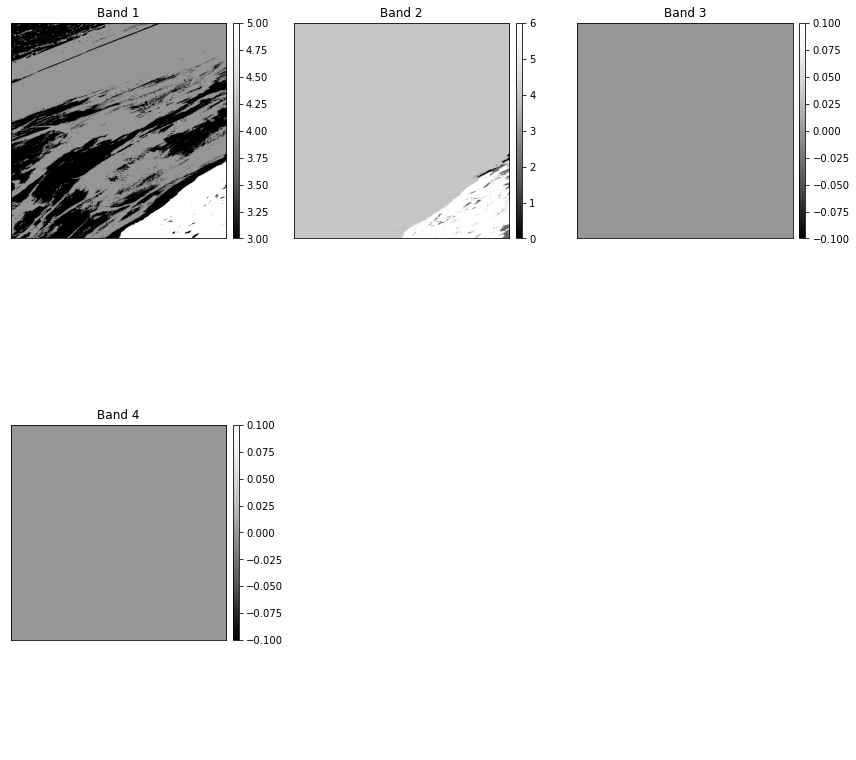

In [6]:
ep.plot_bands(thermal_anomalies_modis,
              scale=False)
plt.show()


In [7]:
# View entire metadata object 
# for the last MODIS band processed in loop
modis_meta


{'driver': 'HDF4Image', 'dtype': 'uint16', 'nodata': None, 'width': 1200, 'height': 1200, 'count': 8, 'crs': CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1]]'), 'transform': Affine(926.6254330558345, 0.0, -11119505.196667,
       0.0, -926.6254330550003, 5559752.598333), 'tiled': False}

In [8]:
# View just the nodata value
modis_meta["nodata"]


In [9]:
# Mask no data values
thermal_anomalies_modis = ma.masked_where(
    thermal_anomalies_modis == modis_meta["nodata"], thermal_anomalies_modis)


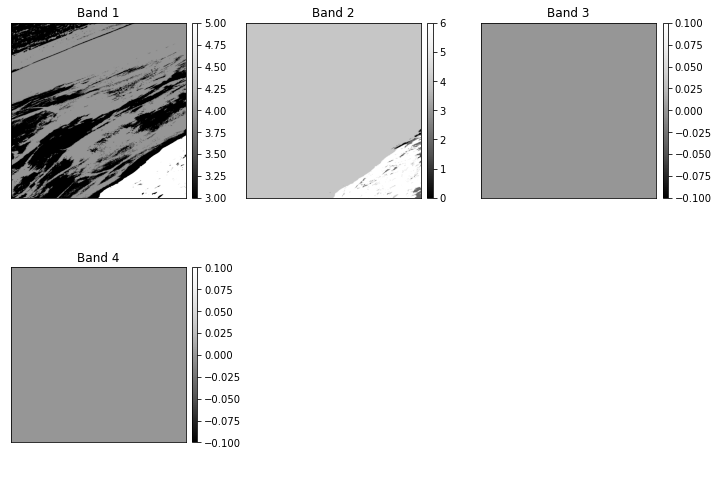

In [10]:
ep.plot_bands(thermal_anomalies_modis,
              scale=False,
              figsize=(10, 7))
plt.show()


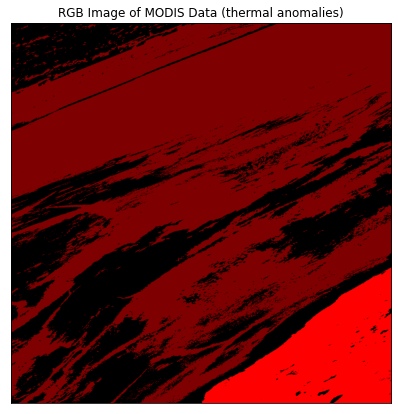

In [11]:
# Plot MODIS RGB
ep.plot_rgb(thermal_anomalies_modis,
            rgb=[0, 3, 2],
            title='RGB Image of MODIS Data (thermal anomalies)',
            stretch=True,
            figsize=(7, 7))

plt.show()
